Модель для предсказания диагноза атеросклероз
ЗП - принадлежность к группе здоровых-0 или больных -1 пациентов.

Предикторы:

Sis -систолическое давление

Dia -диастолическое давление

AI - атерогенный индекс

LDL - концентрация липопротеинов низкой плотности

Sm - курение

HT - гипертония

Dm - диабет

LVH - левожелудочковая дисфункция

Предобработка:

Генерация бутстрапированных подвыборок


# Библиотеки


In [ ]:
# @title
install.packages("tidyverse")

library(tidyverse)

require(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: readxl



In [ ]:
# @title
install.packages("skimr")
library(skimr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Загрузка библиотеки openxlsx
install.packages("openxlsx")
library(openxlsx)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [ ]:
# @title
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [ ]:
# @title
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# @title
install.packages("fitdistrplus")

library(fitdistrplus)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: survival



In [ ]:
# @title
install.packages("stats")
library(stats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [ ]:
install.packages("boot")
library(boot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘boot’


The following object is masked from ‘package:survival’:

    aml


The following object is masked from ‘package:psych’:

    logit




In [ ]:
install.packages("MuMIn")
library(MuMIn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘insight’




In [ ]:
# Установка пакета car
install.packages("car")

# Загрузка пакета car
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:boot’:

    logit


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




# Предобработка данных

In [ ]:
library(readxl)
library(dplyr)

# Чтение данных из файла Excel
meta <- read_xlsx('metadata.xlsx', sheet = 1)

# Переименование столбцов (используем make.names для корректного имени)
meta <- meta %>% rename_all(~ make.names(.))

# Преобразование столбцов в факторы
meta <- meta %>% mutate(Patient.number = as.factor(Patient.number), Vial.number = as.factor(Vial.number))

In [ ]:
columns_list <- colnames(meta)
columns_list

[1] "Vial.number"      "Patient.number"   "Sucrose"          "Name"            
 [5] "Group"            "Date"             "Age"              "Plasma.volume"   
 [9] "Ht"               "Wt"               "BMI"              "Sys"             
[13] "Dia"              "PR"               "Sm"               "Dm"              
[17] "HT"               "LVH"              "IHD"              "MI"              
[21] "Str"              "A_C"              "A_H"              "A_D"             
[25] "Choi...25"        "Tgi...26"         "HDLi...27"        "LDLi...28"       
[29] "Choi...29"        "Tgi...30"         "HDLi...31"        "LDLi...32"       
[33] "AI"               "r.lat.min"        "r.ant.min"        "r.pos.min"       
[37] "l.lat.min"        "l.ant.min"        "l.pos.min"        "r.lat.max"       
[41] "r.ant.max"        "r.pos.max"        "l.lat.max"        "l.ant.max"       
[45] "l.pos.max"        "carotid.IMT.mean" "Plaque"           "Statins"         
[49] "comorbidities"

In [ ]:
meta$Group <- factor(meta$Group)
meta$HT <- factor(meta$HT)
meta$HT <- factor(meta$Sm)
meta$HT <- factor(meta$Dm)
meta$HT <- factor(meta$LVH)
meta$HT <- factor(meta$IHD)

In [ ]:
categorial_list <- meta[c("Group", "HT", "Sm", "Dm", "LVH", "IHD")]

numeric_list <- meta[c("Sys", "Dia", "LDLi...28", "AI", "LDLi...32")]

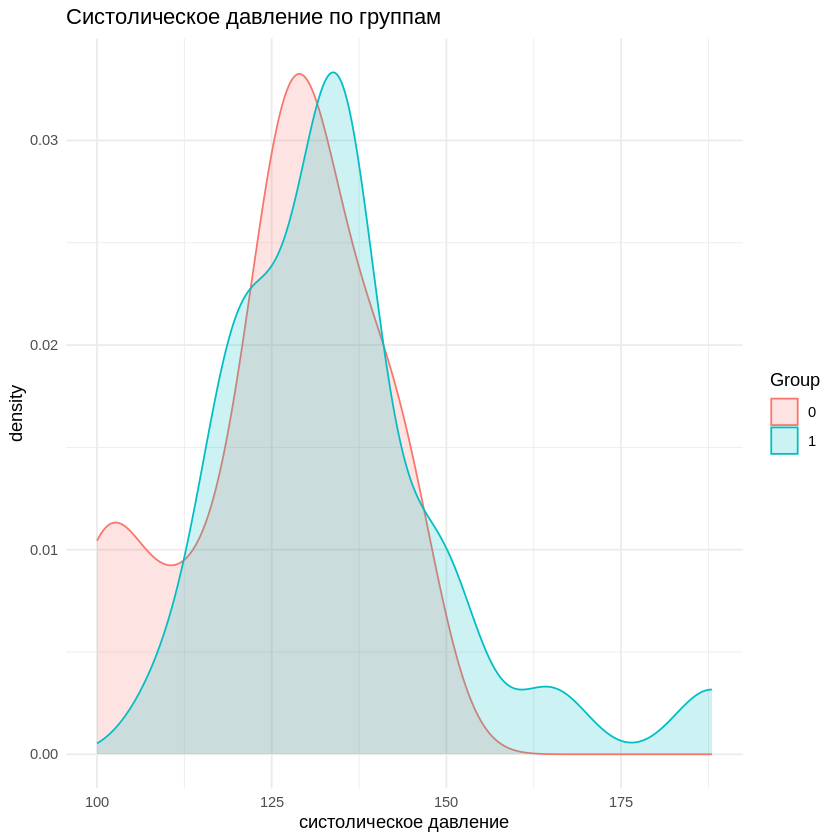

In [ ]:
ggplot(meta, aes(x = Sys, col  = Group, fill = Group, group = Group)) + geom_density(alpha = 0.2) +
  labs(title = "Систолическое давление по группам", x = "систолическое давление") + theme_minimal()

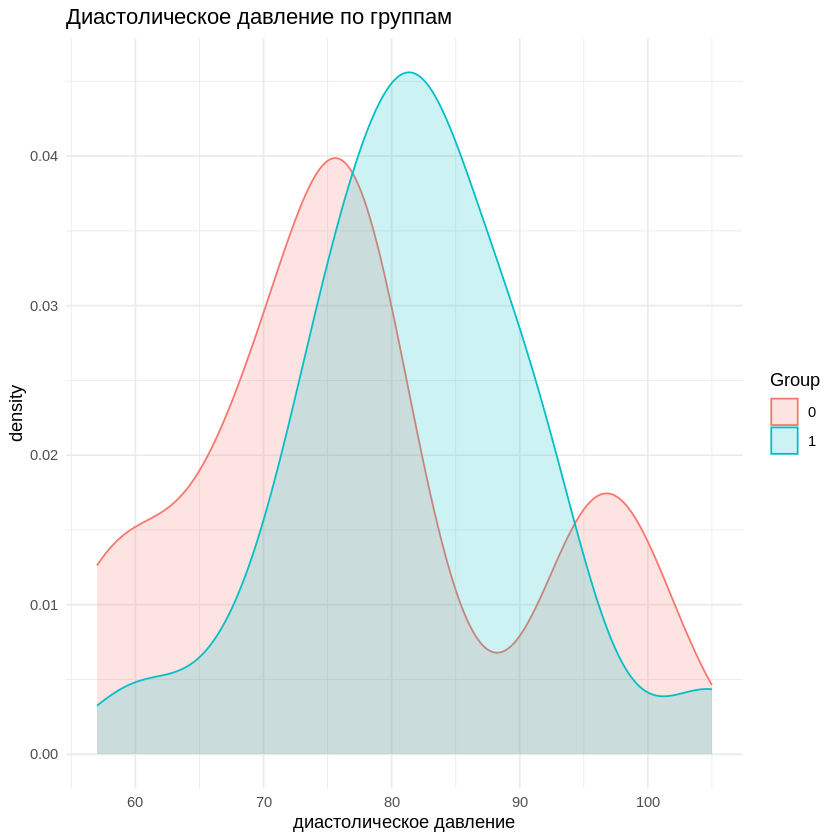

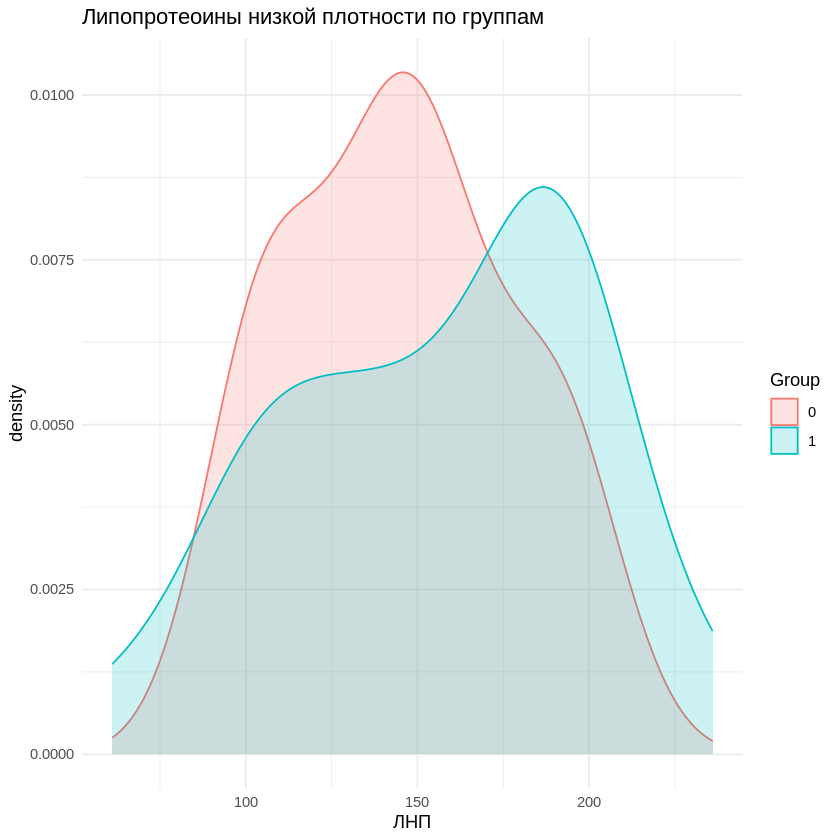

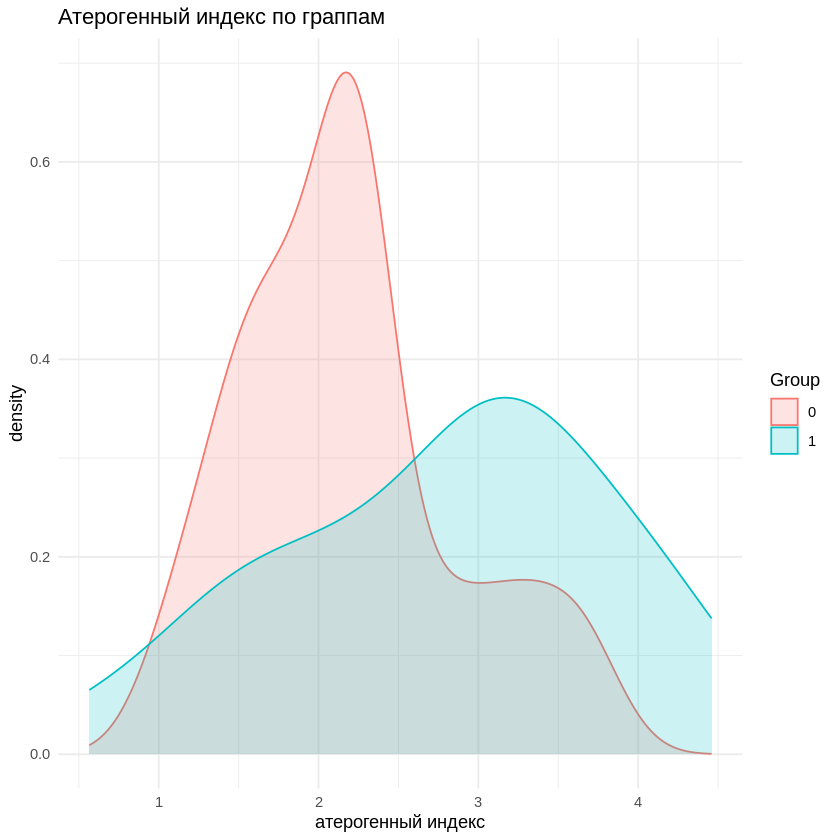

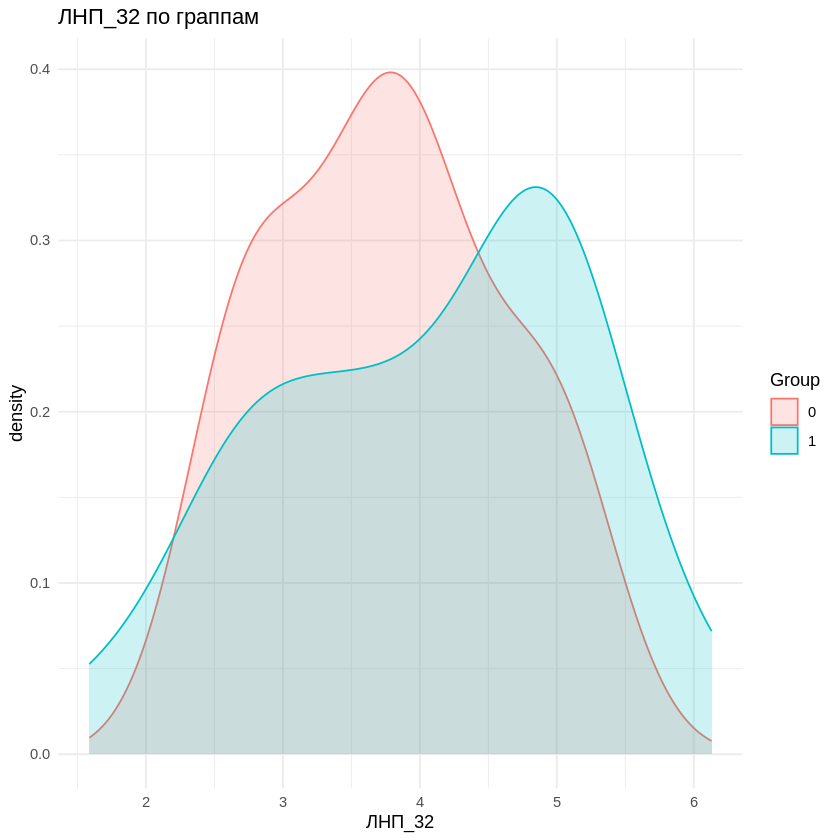

In [ ]:
ggplot(meta, aes(x = Dia, col  = Group, fill = Group, group = Group)) + geom_density(alpha = 0.2) +
  labs(title = "Диастолическое давление по группам", x = "диастолическое давление") + theme_minimal()

ggplot(meta, aes(x = LDLi...28, col  = Group, fill = Group, group = Group)) + geom_density(alpha = 0.2) +
  labs(title = "Липопротеоины низкой плотности по группам", x = "ЛНП") + theme_minimal()

ggplot(meta, aes(x = AI, col  = Group, fill = Group, group = Group)) + geom_density(alpha = 0.2) +
  labs(title = "Атерогенный индекс по граппам", x = "атерогенный индекс") + theme_minimal()

ggplot(meta, aes(x = LDLi...32, col  = Group, fill = Group, group = Group)) + geom_density(alpha = 0.2) +
  labs(title = "ЛНП_32 по граппам", x = "ЛНП_32") + theme_minimal()




In [ ]:
# Объединение столбцов в новый датафрейм df
df <- cbind(numeric_list, categorial_list)
df

Sys,Dia,LDLi...28,AI,LDLi...32,Group,HT,Sm,Dm,LVH,IHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
125,76,106.0,1.6232772,2.753247,0,0,0,0,1,0
125,82,189.5,3.6372361,4.922078,0,0,0,0,1,0
132,80,138.0,3.5751295,3.584416,1,1,0,1,1,1
130,90,188.0,3.6223507,4.883117,1,0,0,0,0,0
135,75,97.0,1.2630208,2.519481,1,1,0,0,0,1
110,75,200.0,3.2310178,5.194805,1,1,0,0,1,1
124,82,196.0,3.2078560,5.090909,1,1,0,0,0,1
135,78,181.0,3.1754386,4.701299,1,1,0,0,1,1
142,95,190.0,2.8315946,4.935065,0,0,0,0,0,0


In [ ]:
# Создаем функцию для загрузки бутстрап-выборок для непрерывных и бинарных переменных
bootstrap_function_n <- function(df, group_value, variable) {
  boot(df[df$Group == group_value, variable], statistic = function(x, i) mean(x[i]), R = 1000)
}

bootstrap_results_n_sys <- bootstrap_function_n(df, 0, "Sys")
bootstrap_results_n_dia <- bootstrap_function_n(df, 0, "Dia")
bootstrap_results_n_ldl28 <- bootstrap_function_n(df, 0, "LDLi...28")
bootstrap_results_n_ai <- bootstrap_function_n(df, 0, "AI")
bootstrap_results_n_ldl32 <- bootstrap_function_n(df, 0, "LDLi...32")


In [ ]:
tabl_bootstrap_n <- function(df, group_value) {
  headers <- colnames(df)[1:5]
  bootstrapped_results <- list()
  for (i in 1:length(headers)) {
    result <- boot(df[df$Group == group_value, headers[i]],
                   statistic = function(x, i) mean(x[i]),
                   R = 1000)
    bootstrapped_results[[headers[i]]] <- result
  }
  return(bootstrapped_results)
}

In [ ]:
bootstrap_results_n <- tabl_bootstrap_n(df, 0)

In [ ]:
bootstrap_results_n

$Sys

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df[df$Group == group_value, headers[i]], statistic = function(x, 
    i) mean(x[i]), R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 126.2857 -0.1555714    3.396169

$Dia

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df[df$Group == group_value, headers[i]], statistic = function(x, 
    i) mean(x[i]), R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1*       77 0.01792857    3.304841

$LDLi...28

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df[df$Group == group_value, headers[i]], statistic = function(x, 
    i) mean(x[i]), R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 145.1357 -0.1123143    8.417014

$AI

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df[df$Group == group_value, headers[i]], statistic = function(x, 
    i) mean(x[i]), R = 1000)


Bootstrap Statistics :
    original       bias    std. error
t1* 2.180222 -0.004489

In [ ]:
# Создаем функцию для загрузки бутстрап-выборок для непрерывных и бинарных переменных
bootstrap_function_n <- function(df, group_value, variable) {
  boot(df[df$Group == group_value, variable], statistic = function(x, i) mean(x[i]), R = 1000)
}

bootstrap_results_n_d <- bootstrap_function_n(df, 0, "Dia")


In [ ]:
bootstrap_results_n_d


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df[df$Group == group_value, variable], statistic = function(x, 
    i) mean(x[i]), R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*       77   0.058     3.21869

In [ ]:
boot0_sys <- bootstrap_results_n_sys$t %>% as_tibble() %>% mutate(Group = 0) %>% rename(Sys = V1)
boot0_dia <- bootstrap_results_n_dia$t %>% as_tibble() %>% mutate(Group = 0) %>% rename(Dia = V1)
boot0_ldl28 <- bootstrap_results_n_ldl28$t %>% as_tibble() %>% mutate(Group = 0) %>% rename(LDL28 = V1)
boot0_ai <- bootstrap_results_n_ai$t %>% as_tibble() %>% mutate(Group = 0) %>% rename(AI = V1)
boot0_ldl32 <- bootstrap_results_n_ldl32$t %>% as_tibble() %>% mutate(Group = 0) %>% rename(LDL32 = V1)


Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


In [ ]:
boot0_dia

Dia,Group
<dbl>,<dbl>
78.57143,0
74.42857,0
76.64286,0
74.07143,0
78.64286,0
79.07143,0
73.42857,0
79.71429,0
81.64286,0


In [ ]:
boot0_sys

Sys,Group
<dbl>,<dbl>
123.1429,0
128.7857,0
123.7857,0
116.9286,0
129.8571,0
130.1429,0
132.0000,0
126.6429,0
126.7857,0


In [ ]:
bootstrap_results_n_d <- bootstrap_function_n(df, 1, "Dia")
boot1_dia <- bootstrap_results_n_d$t %>% as_tibble() %>% mutate(Group = 1) %>% rename(Dia = V1)

In [ ]:
boot1_dia

Dia,Group
<dbl>,<dbl>
84.04167,1
81.62500,1
82.79167,1
79.45833,1
79.70833,1
83.58333,1
81.04167,1
82.25000,1
82.70833,1


In [ ]:
bootstrap_results_n_sys <- bootstrap_function_n(df, 1, "Sys")
bootstrap_results_n_dia <- bootstrap_function_n(df, 1, "Dia")
bootstrap_results_n_ldl28 <- bootstrap_function_n(df, 1, "LDLi...28")
bootstrap_results_n_ai <- bootstrap_function_n(df, 1, "AI")
bootstrap_results_n_ldl32 <- bootstrap_function_n(df, 1, "LDLi...32")

In [ ]:
boot1_sys <- bootstrap_results_n_sys$t %>% as_tibble() %>% mutate(Group = 1) %>% rename(Sys = V1)
boot1_dia <- bootstrap_results_n_dia$t %>% as_tibble() %>% mutate(Group = 1) %>% rename(Dia = V1)
boot1_ldl28 <- bootstrap_results_n_ldl28$t %>% as_tibble() %>% mutate(Group = 1) %>% rename(LDL28 = V1)
boot1_ai <- bootstrap_results_n_ai$t %>% as_tibble() %>% mutate(Group = 1) %>% rename(AI = V1)
boot1_ldl32 <- bootstrap_results_n_ldl32$t %>% as_tibble() %>% mutate(Group = 1) %>% rename(LDL32 = V1)

In [ ]:

#для категориальной переменной в качестве статистики для бутстрепа я выбрала отношение шансов
#4 из 5 переменных занулились на бутстрепе. Очевидно, это связано с очень редкими случаями значений 1 в изначальной выборке. Поэтому я оставила для итоговой модели только LVH

bootstrap_function_c <- function(df, group_value, variable) {
  boot(df[df$Group == group_value, variable], statistic = function(x, i) odds.ratio(x[i]), R = 1000)
  }


bootstrap_results_c_lvh <- bootstrap_function_n(df, 0, "LVH")

bootstrap_results_c_lvh <- bootstrap_function_n(df, 1, "LVH")

In [ ]:
boot0_lvh <- bootstrap_results_c_lvh$t %>% as_tibble() %>% mutate(Group = 0) %>% rename(LVH = V1)
boot1_lvh <- bootstrap_results_c_lvh$t %>% as_tibble() %>% mutate(Group = 1) %>% rename(LVH = V1)

In [ ]:
# Объединяем  датафреймы
bootstraps_combined_LVH <- bind_rows(boot1_lvh, boot0_lvh)

bootstraps_combined_sys <- bind_rows(boot1_sys,boot0_sys)

bootstraps_combined_dia <- bind_rows(boot1_dia,boot0_dia)
bootstraps_combined_ai <- bind_rows(boot1_ai,boot0_ai)
bootstraps_combined_ldl28 <- bind_rows(boot1_ldl28,boot0_ldl28)
bootstraps_combined_ldl32 <- bind_rows(boot1_ldl32,boot0_ldl32)



In [ ]:
bootstraps_combined_sys <- bootstraps_combined_sys[, !(names(bootstraps_combined_sys) %in% c("Group"))]

In [ ]:
bootstraps_combined_dia <- bootstraps_combined_dia[, !(names(bootstraps_combined_dia) %in% c("Group"))]

bootstraps_combined_ai <- bootstraps_combined_ai[, !(names(bootstraps_combined_ai) %in% c("Group"))]

bootstraps_combined_ldl28 <- bootstraps_combined_ldl28[, !(names(bootstraps_combined_ldl28) %in% c("Group"))]

bootstraps_combined_ldl32 <- bootstraps_combined_ldl32[, !(names(bootstraps_combined_ldl32) %in% c("Group"))]


In [ ]:
bootstraps_combined_1 <- cbind(bootstraps_combined_LVH, bootstraps_combined_sys, bootstraps_combined_dia, bootstraps_combined_ai, bootstraps_combined_ldl28, bootstraps_combined_ldl32)

И вот, наконец, собираю итоговый датафрейм для GLM после бутстрепа по каждой выбранной переменной.

In [ ]:
bootstraps_combined_1

LVH,Group,Sys,Dia,AI,LDL28,LDL32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3333333,1,137.6667,82.66667,2.456765,169.0583,3.694805
0.6250000,1,135.0417,77.41667,2.655859,174.3208,3.849026
0.6666667,1,137.1250,81.29167,2.765761,172.8375,4.091667
0.5833333,1,135.4167,81.41667,2.910993,143.4708,4.250758
0.4583333,1,136.0417,81.66667,2.783345,155.2583,3.958766
0.5833333,1,136.3750,80.79167,2.675174,152.4917,4.039069
0.3750000,1,133.7500,80.08333,2.964584,158.1250,4.031385
0.5000000,1,134.7500,83.16667,2.663452,149.5750,4.145130
0.5000000,1,134.5417,81.45833,2.984228,163.0458,4.294372


# GLM


In [ ]:
model_0<-glm(formula = Group~1, data=bootstraps_combined_1, family = 'binomial')

#модель по переменным без преобразований
model_01<-glm(formula = Group~1+Sys+Dia+AI+LDL28+LDL32, data=bootstraps_combined_1, family = 'binomial')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
model_01


Call:  glm(formula = Group ~ 1 + Sys + Dia + AI + LDL28 + LDL32, family = "binomial", 
    data = bootstraps_combined_1)

Coefficients:
(Intercept)          Sys          Dia           AI        LDL28        LDL32  
  -284.7504       0.9694       0.7407      19.8903       0.1740       5.9453  

Degrees of Freedom: 1999 Total (i.e. Null);  1994 Residual
Null Deviance:	    2773 
Residual Deviance: 73.6 	AIC: 85.6

In [ ]:
model_0


Call:  glm(formula = Group ~ 1, family = "binomial", data = bootstraps_combined_1)

Coefficients:
(Intercept)  
  8.174e-17  

Degrees of Freedom: 1999 Total (i.e. Null);  1999 Residual
Null Deviance:	    2773 
Residual Deviance: 2773 	AIC: 2775

In [ ]:
# Создаем список кандидатов в модель
candidate_models <- list(
  ~ 1,
  ~ Sys,
  ~ Dia,
  ~ AI,
  ~ LDL28,
  ~ LDL32,
  ~ Sys + Dia,
  ~ Sys + AI,
  ~ Sys + LDL28,
  ~ Sys + LDL32,
  ~ Dia + AI,
  ~ Dia + LDL28,
  ~ Dia + LDL32,
  ~ AI + LDL28,
  ~ AI + LDL32,
  ~ LDL28 + LDL32,
  ~ Sys + Dia + AI,
  ~ Sys + Dia + LDL28,
  ~ Sys + Dia + LDL32,
  ~ Sys + AI + LDL28,
  ~ Sys + AI + LDL32,
  ~ Sys + LDL28 + LDL32,
  ~ Dia + AI + LDL28,
  ~ Dia + AI + LDL32,
  ~ Dia + LDL28 + LDL32,
  ~ AI + LDL28 + LDL32,
  ~ Sys + Dia + AI + LDL28,
  ~ Sys + Dia + AI + LDL32,
  ~ Sys + Dia + LDL28 + LDL32,
  ~ Sys + AI + LDL28 + LDL32,
  ~ Dia + AI + LDL28 + LDL32,
  ~ Sys + Dia + AI + LDL28 + LDL32
)

# Выполняем пошаговый отбор моделей с использованием AIC
step_model <- step(glm(formula = Group ~ ., data = bootstraps_combined_1, family = 'binomial'),
                  scope = candidate_models,
                  direction = 'both')

# Выводим результаты пошагового отбора
summary(step_model)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Start:  AIC=87.25
Group ~ LVH + Sys + Dia + AI + LDL28 + LDL32



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


        Df Deviance    AIC
- LVH    1    73.60  85.60
<none>        73.25  87.25
- LDL32  1    96.48 108.48
- LDL28  1   102.16 114.16
- Dia    1   120.81 132.81
- Sys    1   248.47 260.47
- AI     1   378.14 390.14


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=85.6
Group ~ Sys + Dia + AI + LDL28 + LDL32



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


        Df Deviance    AIC
<none>        73.60  85.60
- LDL32  1    97.09 107.09
- LDL28  1   102.71 112.71
- Dia    1   121.23 131.23
- Sys    1   248.99 258.99
- AI     1   378.16 388.16



Call:
glm(formula = Group ~ Sys + Dia + AI + LDL28 + LDL32, family = "binomial", 
    data = bootstraps_combined_1)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -284.7504    38.3201  -7.431 1.08e-13 ***
Sys            0.9694     0.1509   6.423 1.34e-10 ***
Dia            0.7408     0.1533   4.833 1.35e-06 ***
AI            19.8903     3.0452   6.532 6.51e-11 ***
LDL28          0.1740     0.0394   4.416 1.01e-05 ***
LDL32          5.9454     1.4542   4.088 4.35e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2772.589  on 1999  degrees of freedom
Residual deviance:   73.599  on 1994  degrees of freedom
AIC: 85.599

Number of Fisher Scoring iterations: 11


In [ ]:
model_02<-glm(formula = Group~1+Sys + Dia + AI + LDL28 + LDL32, data=bootstraps_combined_1, family = 'binomial')
# Вычисляем фактор инфляции дисперсии (GVIF) для объясняющих переменных в модели model_01
vif(model_02) # если в модели нет переменных с df>1, то считается vif, а не gvif



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Sys      Dia       AI    LDL28    LDL32 
1.849250 1.281828 1.800603 1.250443 1.310221

In [ ]:
confint(model_02)

Waiting for profiling to be done...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted proba

,2.5 %,97.5 %
(Intercept),-373.5887494,-220.7724502
Sys,0.7131606,1.3136121
Dia,0.4768359,1.0870115
AI,14.8164519,26.9405188
LDL28,0.1034897,0.2601408
LDL32,3.3186647,9.0975370


In [ ]:
# Стандартизовать переменные
factors_to_scale <- c("Sys", "Dia", "AI", "LDL28", "LDL32")

# Создать новый набор данных с масштабированными факторами
bootstraps_combined_1_std <- bootstraps_combined_1
bootstraps_combined_1_std[, factors_to_scale] <- scale(bootstraps_combined_1[, factors_to_scale])


In [ ]:
bootstraps_combined_1_std

LVH,Group,Sys,Dia,AI,LDL28,LDL32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3333333,1,1.28751196,0.90887461,-0.084172023,1.74746797,-0.803576862
0.6250000,1,0.80510826,-0.55963289,0.471074062,2.26160971,-0.234667498
0.6666667,1,1.18796834,0.52426550,0.777574097,2.11668931,0.660416567
0.5833333,1,0.87402307,0.55922997,1.182606278,-0.75240887,1.247291489
0.4583333,1,0.98888110,0.62915890,0.826614819,0.39921978,0.170156428
0.5833333,1,1.05013871,0.38440765,0.524939734,0.12891882,0.466388531
0.3750000,1,0.56773501,0.18627568,1.332066106,0.67929066,0.438042872
0.5000000,1,0.75150785,1.04873247,0.492249962,-0.15603702,0.857638479
0.5000000,1,0.71322184,0.57088479,1.386848542,1.16005186,1.408183049


In [ ]:
model_02_std <- glm(formula = Group~1+Sys+Dia+AI+LDL28+LDL32, data=bootstraps_combined_1_std, family = 'binomial')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
summary(model_02_std)


Call:
glm(formula = Group ~ 1 + Sys + Dia + AI + LDL28 + LDL32, family = "binomial", 
    data = bootstraps_combined_1_std)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.2328     0.3908  -0.596    0.551    
Sys           5.2748     0.8213   6.423 1.34e-10 ***
Dia           2.6482     0.5480   4.833 1.35e-06 ***
AI            7.1320     1.0919   6.532 6.51e-11 ***
LDL28         1.7810     0.4033   4.416 1.01e-05 ***
LDL32         1.6117     0.3942   4.088 4.35e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2772.589  on 1999  degrees of freedom
Residual deviance:   73.599  on 1994  degrees of freedom
AIC: 85.599

Number of Fisher Scoring iterations: 11


In [ ]:
#Проводим анализ дисперсии (ANOVA) для сравнения моделей model_0 и model_01 с использованием критерия отношения правдоподобия (LRT)
anova(model_0, model_02_std, test="LRT") #test="LRT" обязательно добавлять для glm

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1999,2772.58872,NA,NA,NA
2,1994,73.59855,5,2698.99,0


In [ ]:
confint(model_02_std)

Waiting for profiling to be done...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted proba

,2.5 %,97.5 %
(Intercept),-1.0440377,0.5174297
Sys,3.8806639,7.1480208
Dia,1.7047162,3.8861296
AI,5.3127245,9.6600425
LDL28,1.0592695,2.6626719
LDL32,0.8996285,2.4661736


Если доверительный интервал не включает 0, то можно сделать вывод о том, что соответствующий фактор статистически значимо связан с зависимой переменной (наличием атеросклероза) на уровне значимости 5%.

В данном случае все доверительные интервалы не включают 0, что означает, что все факторы (Sys, Dia, AI, LDL28, LDL32) статистически значимо связаны с наличием атеросклероза на уровне значимости 5%

Найдем пороговые значения для каждого фактора, которые позволяют подозревать развитие атеросклероза.

In [ ]:
# Создаем объект данных с предсказанными вероятностями для разных значений Sys
predictions <- predict(model_02, newdata = bootstraps_combined_1, type = "response")

# Находим значение Sys, при котором предсказанная вероятность Group == 1 равна 0,5
threshold <- bootstraps_combined_1[which(predictions > 0.5), "Sys"][1]

# Выводим пороговое значение
print(threshold)




[1] 137.6667


In [ ]:
# Находим значение Sys, при котором предсказанная вероятность Group == 1 равна 0,5
threshold_dia <- bootstraps_combined_1[which(predictions > 0.5), "Dia"][1]

# Выводим пороговое значение
print(threshold_dia)

[1] 83.83333


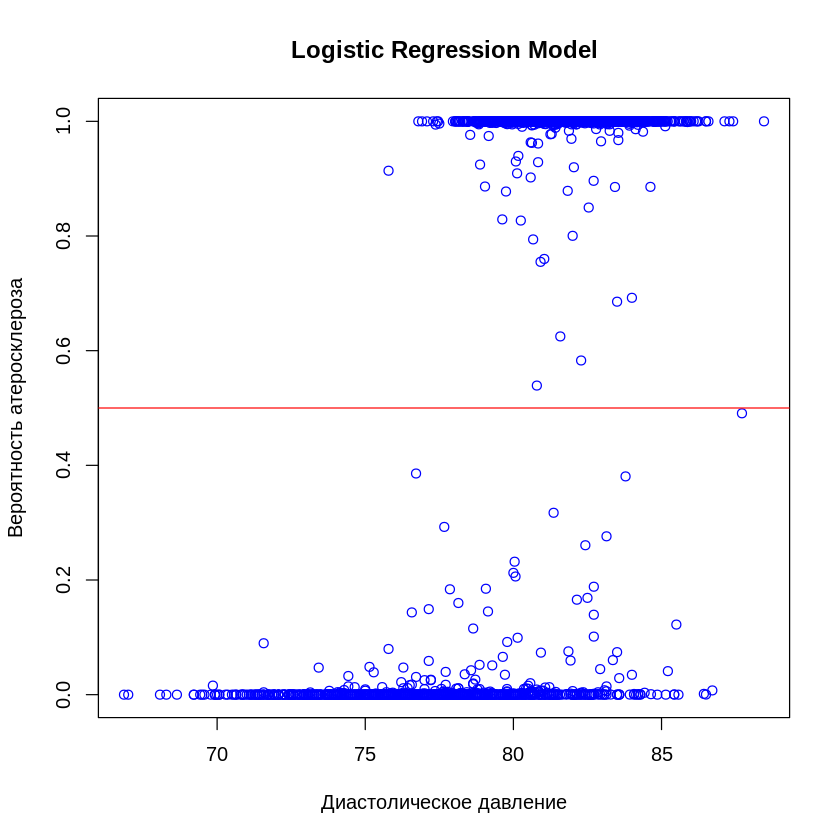

In [ ]:
# Постройте график предсказанных вероятностей как функцию от Sys
plot(bootstraps_combined_1$Dia, predictions, col = 'blue', xlab = "", ylab = "")
abline(h = 0.5, col = 'red')
mtext('Диастолическое давление', side = 1, line = 3)
mtext('Вероятность атеросклероза', side = 2, line = 3)
title('Logistic Regression Model')

In [ ]:
# Находим значение Sys, при котором предсказанная вероятность Group == 1 равна 0,5
threshold_ai <- bootstraps_combined_1[which(predictions > 0.5), "AI"][1]

# Выводим пороговое значение
print(threshold_ai)

[1] 2.579428


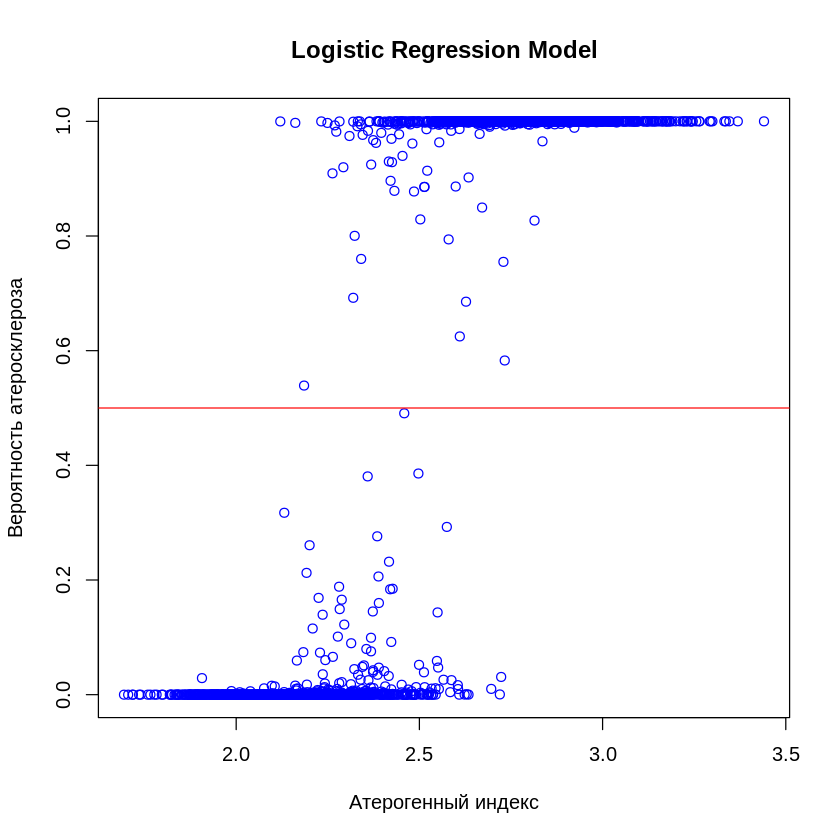

In [ ]:
# Постройте график предсказанных вероятностей как функцию от Sys
plot(bootstraps_combined_1$AI, predictions, col = 'blue', xlab = "", ylab = "")
abline(h = 0.5, col = 'red')
mtext('Атерогенный индекс', side = 1, line = 3)
mtext('Вероятность атеросклероза', side = 2, line = 3)
title('Logistic Regression Model')

In [ ]:
# Находим значение Sys, при котором предсказанная вероятность Group == 1 равна 0,5
threshold_ldl28 <- bootstraps_combined_1[which(predictions > 0.5), "LDL28"][1]

# Выводим пороговое значение
print(threshold_ldl28)

[1] 154.45


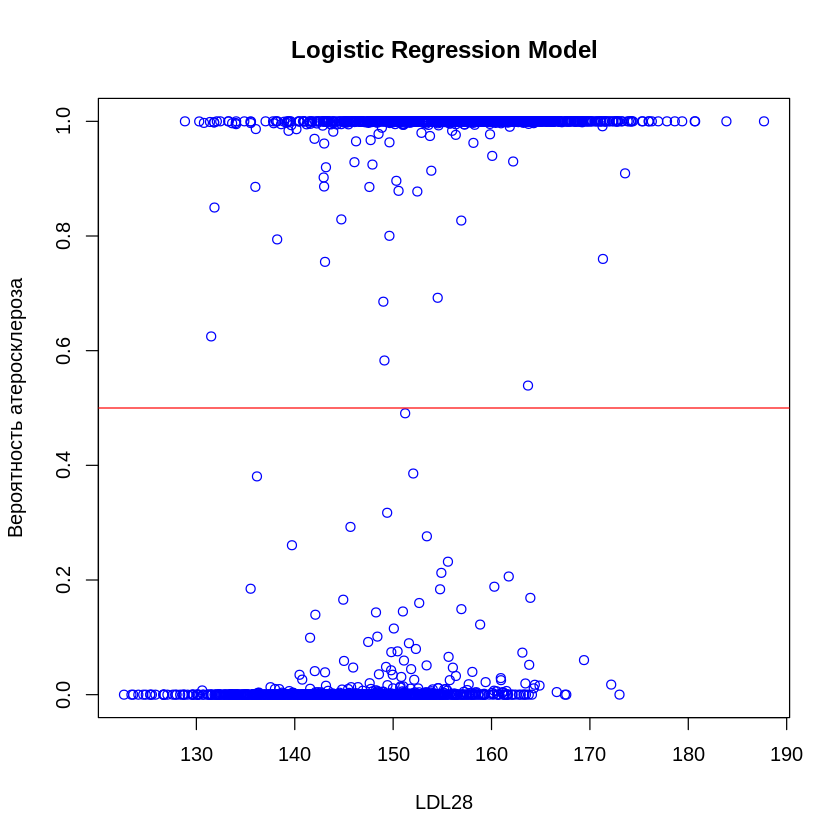

In [ ]:
# Постройте график предсказанных вероятностей как функцию от Sys
plot(bootstraps_combined_1$LDL28, predictions, col = 'blue', xlab = "", ylab = "")
abline(h = 0.5, col = 'red')
mtext('LDL28', side = 1, line = 3)
mtext('Вероятность атеросклероза', side = 2, line = 3)
title('Logistic Regression Model')

In [ ]:
# Находим значение Sys, при котором предсказанная вероятность Group == 1 равна 0,5
threshold_ldl32 <- bootstraps_combined_1[which(predictions > 0.5), "LDL32"][1]

# Выводим пороговое значение
print(threshold_ldl32)

[1] 3.946212


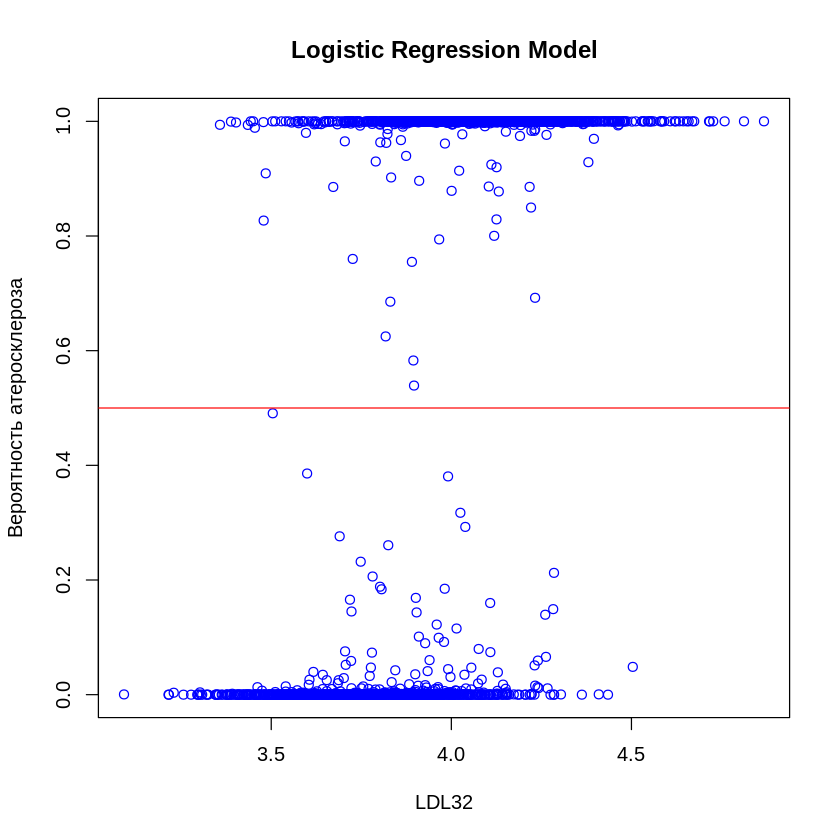

In [ ]:
# Постройте график предсказанных вероятностей как функцию от Sys
plot(bootstraps_combined_1$LDL32, predictions, col = 'blue', xlab = "", ylab = "")
abline(h = 0.5, col = 'red')
mtext('LDL32', side = 1, line = 3)
mtext('Вероятность атеросклероза', side = 2, line = 3)
title('Logistic Regression Model')

Можно сделать вывод, что для прогноза развития атеросклероза самую высокую диагностическую ценность будут иметь два показателя из изучаемых: систолическое давление и атерогенный индекс. Для пациентов систолическим давлением выше 130 и атерогенным индексом выше 2,6 стоит назначать дополнительную диагностику для обнаружения атеросклеротических патологических изменений сосудов.